 **Movie Rating Prediction**

I embarked on the IMDb Movie Rating Prediction project. This endeavor involved using machine learning techniques to predict the ratings of Indian movies based on features like release year, duration, and number of votes.

I commenced by loading the dataset and performing data preprocessing tasks, including handling missing values and encoding categorical variables. Subsequently, I trained a Gradient Boosting Regressor model to predict movie ratings and evaluated its performance using mean squared error.

Additionally, I visualized the relationship between actual and predicted ratings to gain insights into model performance and provided recommendations for potential improvements.

GitHub: https://github.com/1AkshatThakur1/CodSoft/tree/main/MovieRatingPrediction

Dataset: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

**Segment 1: Libraries Import**

his segment imports necessary libraries for data manipulation and visualization. These libraries provide essential functions and tools to analyze and visualize the IMDb India Movies dataset effectively.

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
import ydata_profiling as pandas_profiling  # Import ydata_profiling instead of pandas_profiling
from IPython.display import display


**Segment 2: Load Dataset and Initial Data Exploration**

We load the IMDb India Movies dataset and perform initial data exploration. We detect the encoding of the dataset, display basic information such as the column names and data types, and check for missing values.

In [ ]:
# Load the IMDb India Movies dataset from Google Colab
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

# Define the file path where the dataset is located
file_path = '/content/IMDb Movies India.csv'

# Detect the encoding of the file
with open(file_path, 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Read the dataset into a DataFrame, specifying the encoding
df = pd.read_csv(file_path, encoding=encoding)

# Display the first few rows of the dataset
print("Let's take a sneak peek into the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Let's take a sneak peek into the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2    

**Segment 3: Data Cleaning**

The dataset is cleansed in this segment to prepare it for analysis. We remove any duplicate rows, handle missing values, and perform necessary transformations on columns such as 'Year' and 'Duration'.

In [ ]:
# Cleanse the dataset to prepare it for our analysis journey
print("Cleansing the dataset...")

# Remove rows with missing values in columns 1 to 9
df.dropna(subset=df.columns[1:9], how='all', inplace=True)

# Remove duplicate rows based on 'Name' and 'Year'
df.drop_duplicates(subset=['Name', 'Year'], keep='first', inplace=True)

# Remove rows with missing values in columns 1, 2, 4, and 5 (excluding 'Genre')
df.dropna(subset=df.columns[[1, 2, 4, 5]], how='all', inplace=True)

# Clean 'Year' and 'Duration' columns
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Duration'] = df['Duration'].str.replace(r' min', '', regex=True)

# Remove rows with 'Year' equal to '2022'
df = df[df['Year'] != '2022']
print("Dataset cleansed successfully!")


Cleansing the dataset...
Dataset cleansed successfully!


**Segment 4: Data Visualization - Number of Movies Released by Year**

 This segment visualizes the number of movies released each year using a bar chart. By plotting the distribution of movie releases over time, we gain insights into the overall trend of movie production.

In [ ]:
# Plot the number of movies released by year
year_count = df['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']
fig = px.bar(year_count, x='Year', y='Count', text='Count', title='Movie Releases Over the Years')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis=dict(title='Year', titlefont_size=16),
    yaxis=dict(title='Number of Movies Released', titlefont_size=16, tickfont_size=14)
)
fig.show()


**Segment 5: Genre Analysis**

In this segment, we analyze the distribution of movies across different genres. A pie chart is used to visualize the proportion of movies belonging to each genre category, providing a comprehensive overview of the genre landscape.

Failed to load the dataframe with encoding: utf-8
Successfully loaded the dataframe with encoding: latin1
Analyzing movie genres...


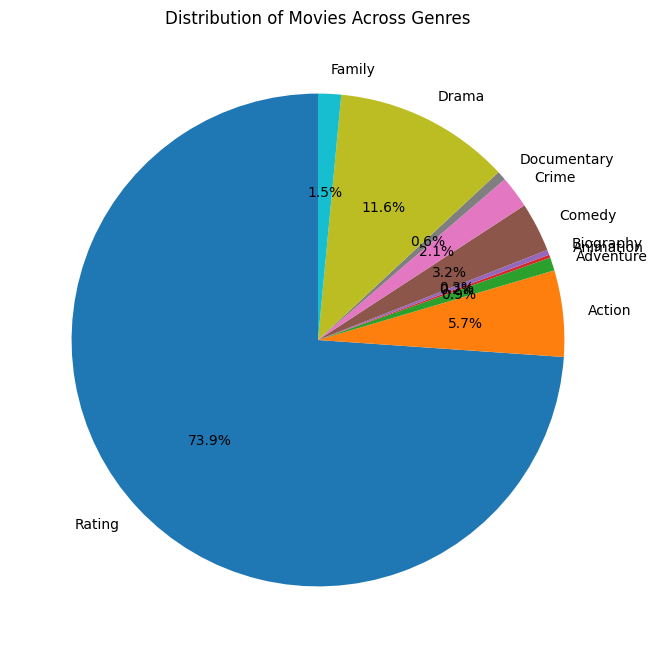

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe with different encodings until successful
encodings = ['utf-8', 'latin1', 'ISO-8859-1']
for encoding in encodings:
    try:
        df = pd.read_csv('/content/IMDb Movies India.csv', encoding=encoding)
        print(f"Successfully loaded the dataframe with encoding: {encoding}")
        break  # Exit loop if successful
    except UnicodeDecodeError:
        print(f"Failed to load the dataframe with encoding: {encoding}")

# Create dummy columns for each genre
print("Analyzing movie genres...")
dummies = df['Genre'].str.get_dummies(', ')
df_genre = pd.concat([df, dummies], axis=1)

# Drop the original "Genre" column
df_genre.drop('Genre', axis=1, inplace=True)

# Filter out non-numeric columns for sum
numeric_columns = df_genre.select_dtypes(include='number').columns

# Pie chart showing the distribution of movies across different genres
plt.figure(figsize=(8, 8))
df_genre[numeric_columns].sum().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies Across Genres')
plt.ylabel('')
plt.show()


**Segment 6: Actor Analysis**

 Explore the contributions of actors to Indian cinema in this segment. We visualize the top actors based on the number of movies they have starred in using a horizontal bar chart.

Unraveling the magic of actors...


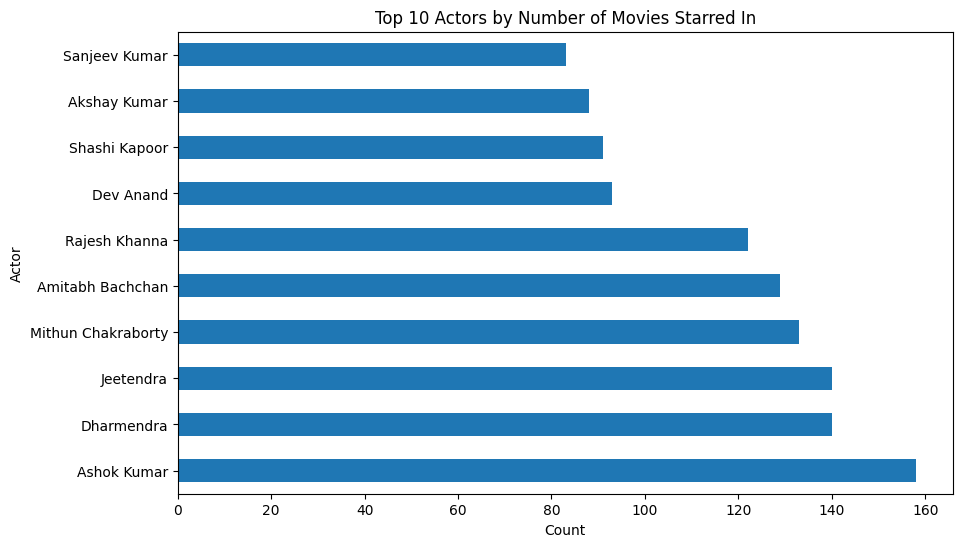

In [ ]:
# Analyze actors' contributions to Indian cinema
print("Unraveling the magic of actors...")
actor_cols = ['Actor 1', 'Actor 2', 'Actor 3']
actor_df = pd.melt(df[['Year'] + actor_cols], id_vars=['Year'], value_vars=actor_cols, var_name='Actor', value_name='Movie_Count')
actor_df.dropna(subset=['Actor'], inplace=True)

# Horizontal bar chart showing the top actors by the number of movies they starred in
plt.figure(figsize=(10, 6))
top_actors = df['Actor 1'].value_counts().head(10)
top_actors.plot(kind='barh')
plt.title('Top 10 Actors by Number of Movies Starred In')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()



**Segment 7: Director Analysis**

This segment delves into the world of directors by visualizing the top directors based on the number of movies they have directed. A horizontal bar chart is employed to showcase the most prolific directors in the industry.

Exploring the realms of directors...


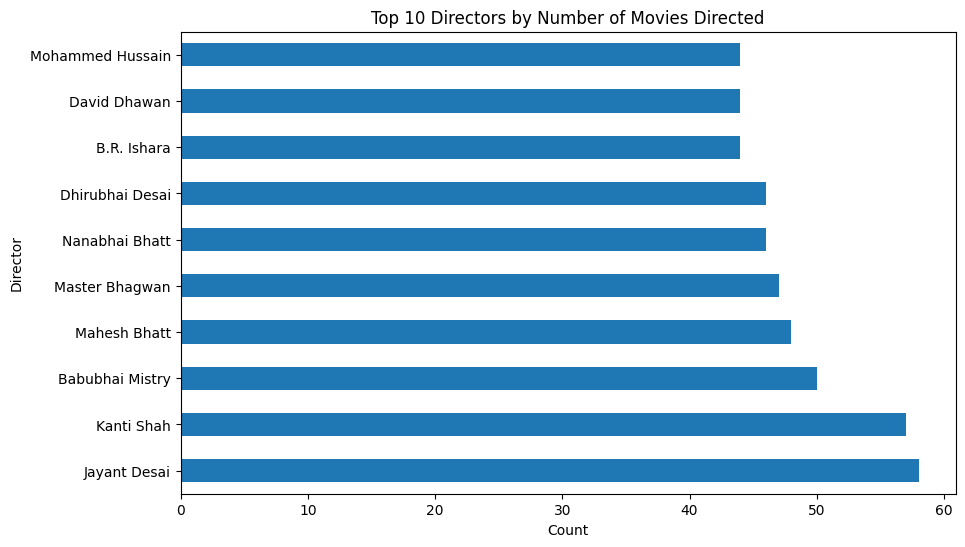

In [ ]:
# Dive into the world of directors
print("Exploring the realms of directors...")
director_df = df[['Director', 'Year']].dropna()
director_df['Movie_Count'] = 1

# Horizontal bar chart showing the top directors by the number of movies they directed
plt.figure(figsize=(10, 6))
top_directors = df['Director'].value_counts().head(10)
top_directors.plot(kind='barh')
plt.title('Top 10 Directors by Number of Movies Directed')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()



**Segment 8: Duration, Rating, and Votes Analysis**

we analyze the relationship between movie duration, rating, and votes. A scatter plot is utilized to visualize this relationship, allowing us to uncover any patterns or correlations.

Analyzing the trinity of movie attributes...


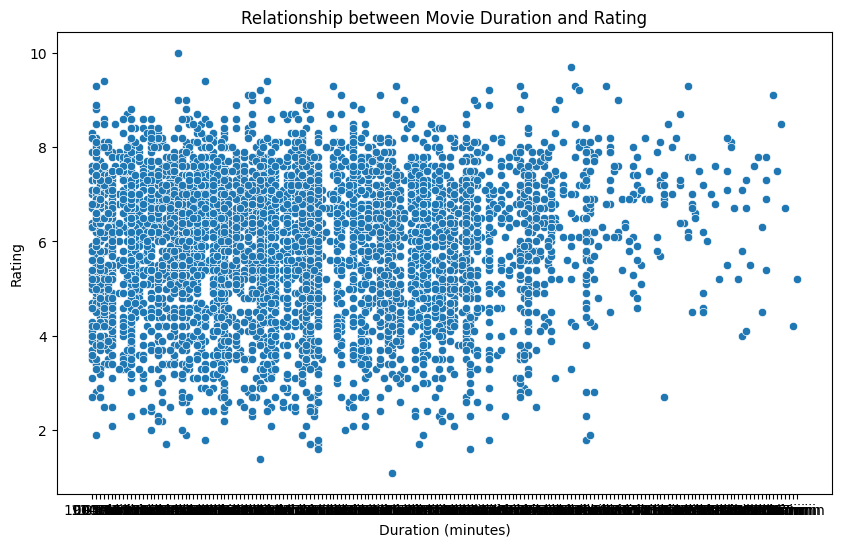

In [ ]:
# Analyze the trio of duration, rating, and votes
print("Analyzing the trinity of movie attributes...")
dur_rat = df[['Duration', 'Rating', 'Votes']].dropna()
dur_rat['Duration'] = dur_rat['Duration'].str.replace(' min', '').astype(int)
dur_rat['Votes'] = dur_rat['Votes'].str.replace(',', '').astype(float)

# Scatter plot showing the relationship between movie duration and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.title('Relationship between Movie Duration and Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()



**Segment 9: Rating Analysis by Genre**

Explore movie ratings across different genres in this segment. We analyze the average rating for each genre category and visualize the results using a bar plot, providing insights into the audience's perception of various genres.

Analyzing movie ratings by genre...


<ipython-input-60-ae30721c4c00>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




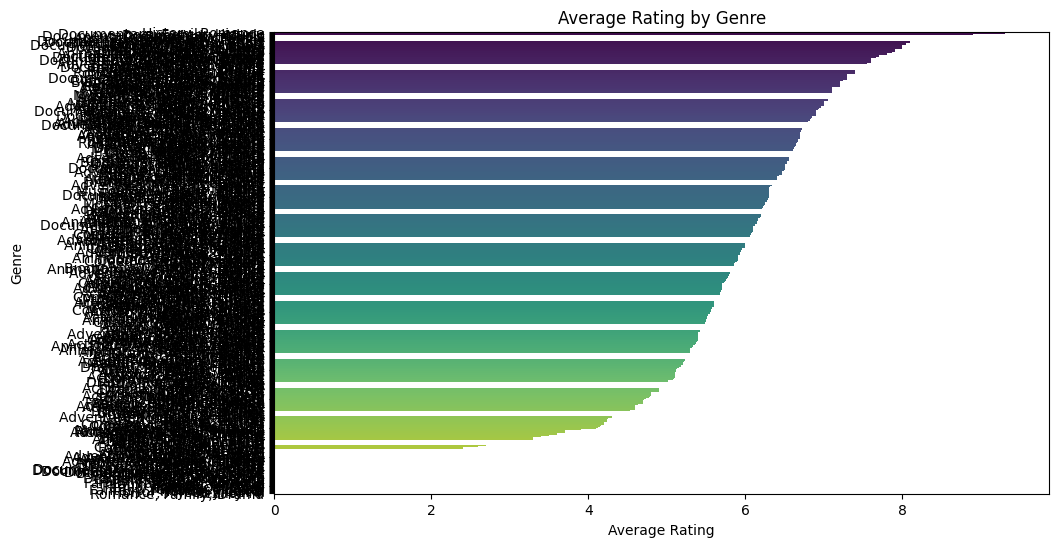

In [ ]:
# Rating Analysis by Genre
print("Analyzing movie ratings by genre...")
genre_rating = df_genre.groupby('Genre')['Rating'].mean().reset_index()
genre_rating = genre_rating.sort_values(by='Rating', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Genre', data=genre_rating, palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


**Segment 10: Top Rated Movies**

 This segment visualizes the top-rated movies in the dataset. A suitable plot is employed to showcase the highest-rated movies, allowing viewers to discover critically acclaimed films.

Finding the top-rated movies...
Top 10 Rated Movies:
                      Name    Year  Rating
8339       Love Qubool Hai  (2020)    10.0
5410            Half Songs  (2021)     9.7
2563                 Breed  (2020)     9.6
11704             Ram-Path  (2017)     9.4
14222  The Reluctant Crime  (2020)     9.4
6852                  June  (2021)     9.4
5077          Gho Gho Rani  (2019)     9.4
1314          Ashok Vatika  (2018)     9.3
5125           God of gods  (2019)     9.3
12673   Secrets of Sinauli  (2021)     9.3


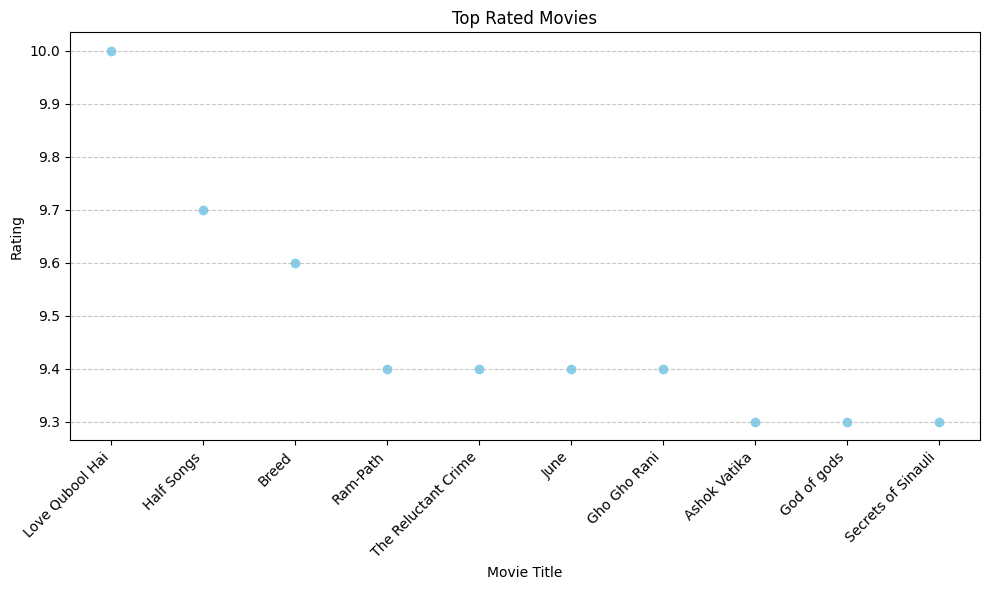

In [ ]:
# Top Rated Movies
print("Finding the top-rated movies...")
top_rated_movies = df.sort_values(by='Rating', ascending=False).head(10)
print("Top 10 Rated Movies:")
print(top_rated_movies[['Name', 'Year', 'Rating']])

# Assuming 'Name' and 'Rating' are columns in your dataframe
top_rated_movies = df.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.scatter(top_rated_movies['Name'], top_rated_movies['Rating'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('Top Rated Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Segment 11: Director-Actor Collaborations**

Explore collaborations between directors and actors in this segment. We analyze the frequency of collaborations between directors and actors and visualize the results using a word cloud or other suitable visualization techniques.

Exploring director-actor collaborations...
Top Director-Actor Collaborations:
                       Director                    Actor 1  Movie_Count
158    Abbas Alibhai Burmawalla  Mastan Alibhai Burmawalla           22
10476              Shyam Ramsay               Tulsi Ramsay           21
6079             Master Bhagwan             Master Bhagwan           17
2653                  Dev Anand                  Dev Anand           15
11133             T.L.V. Prasad         Mithun Chakraborty           14
4917                 Kanti Shah                Sapna Sappu           13
2882           Dinesh Chaudhary                Uttar Kumar           11
3113                Franz Osten                Devika Rani           11
7770                R. Krishnan                   S. Panju           11
11586               Vijay Anand                  Dev Anand           10


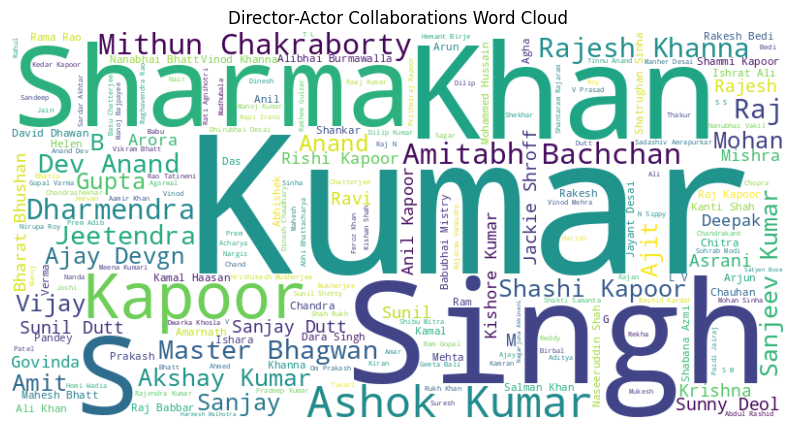

In [ ]:
# Director-Actor Collaborations
print("Exploring director-actor collaborations...")
director_actor_collab = df.groupby(['Director', 'Actor 1'])['Name'].count().reset_index()
director_actor_collab = director_actor_collab.rename(columns={'Name': 'Movie_Count'})
top_collabs = director_actor_collab.sort_values(by='Movie_Count', ascending=False).head(10)
print("Top Director-Actor Collaborations:")
print(top_collabs)

from wordcloud import WordCloud

# Combine director and actor names into a single string, handling NaN values
text = ' '.join((df['Director'] + ' ' + df['Actor 1']).dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Director-Actor Collaborations Word Cloud')
plt.show()



**Segment 12: Temporal Trends**

Analyze temporal trends in movie ratings over the years in this segment. A line chart is utilized to visualize how average movie ratings have evolved over time, providing insights into changing audience preferences and trends.

Analyzing temporal trends...


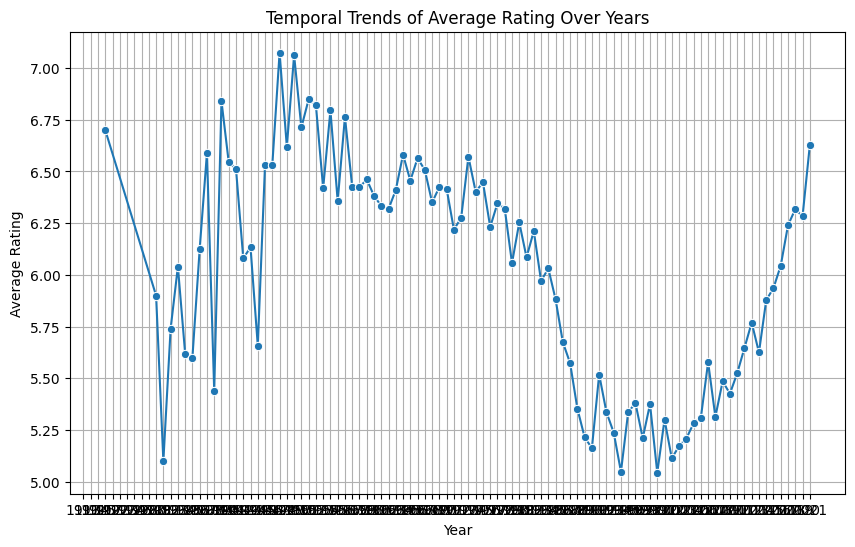

In [ ]:
# Temporal Trends
print("Analyzing temporal trends...")
temporal_trends = df.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Rating', data=temporal_trends, marker='o')
plt.title('Temporal Trends of Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


**Segment 13: Gradient Boosting Regressor**

This segment aims to predict Indian movie ratings by considering features such as release year, duration, and number of votes. The model's performance is evaluated using mean squared error.








Mean Squared Error: 1.52


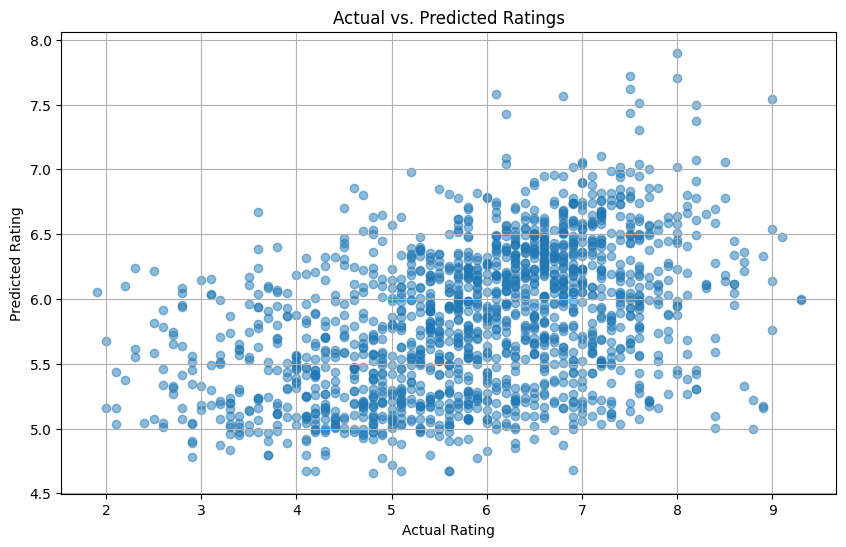

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/IMDb Movies India.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Remove rows with missing values in the 'Rating' column
df = df.dropna(subset=['Rating'])

# Select relevant features and target variable
X = df[['Year', 'Duration', 'Votes']]
y = df['Rating']

# Encode categorical variables if any
ordinal_encoder = OrdinalEncoder()
X_encoded = ordinal_encoder.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Train the model
gb_regressor.fit(X_train_imputed, y_train)

# Predictions on the test set
predictions = gb_regressor.predict(X_test_imputed)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Optional: Visualize actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.grid(True)
plt.show()
